In [1]:
!pip install -q tflite-model-maker

In [2]:
import os
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
import matplotlib.pyplot as plt
import tflite_model_maker

In [3]:
image_path = 'fall_dataset/'

In [4]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 485, num_label: 2, labels: fall, not-fall.


In [5]:
train_data, validation_data = data.split(0.8)

In [6]:
model = image_classifier.create(train_data, model_spec='efficientnet_lite0', validation_data=validation_data, epochs=5)
print(model)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/home/bhavika/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


12/12 [==============================] - 10s 721ms/step - loss: 0.6947 - accuracy: 0.5990 - val_loss: 0.5270 - val_accuracy: 0.7500
Epoch 2/5
12/12 [==============================] - 8s 712ms/step - loss: 0.4371 - accuracy: 0.8438 - val_loss: 0.4222 - val_accuracy: 0.8542
Epoch 3/5
12/12 [==============================] - 10s 844ms/step - loss: 0.3649 - accuracy: 0.9010 - val_loss: 0.3791 - val_accuracy: 0.9062
Epoch 4/5
12/12 [==============================] - 11s 908ms/step - loss: 0.3203 - accuracy: 0.9453 - val_loss: 0.3751 - val_accuracy: 0.9062
Epoch 5/5
12/12 [==============================] - 10s 866ms/step - loss: 0.3095 - accuracy: 0.9453 - val_loss: 0.3301 - val_accuracy: 0.9271


In [7]:
model.export(export_dir='ai_models', tflite_filename='tflite-model-maker-falldetect-model.tflite')

INFO:tensorflow:Assets written to: /tmp/tmpxc4h5xk4/assets


INFO:tensorflow:Assets written to: /tmp/tmpxc4h5xk4/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpmrinp6br/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpmrinp6br/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ai_models/tflite-model-maker-falldetect-model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ai_models/tflite-model-maker-falldetect-model.tflite


In [8]:
accuracy = model.evaluate_tflite('ai_models/tflite-model-maker-falldetect-model.tflite', validation_data)
print(accuracy)

{'accuracy': 0.9278350515463918}


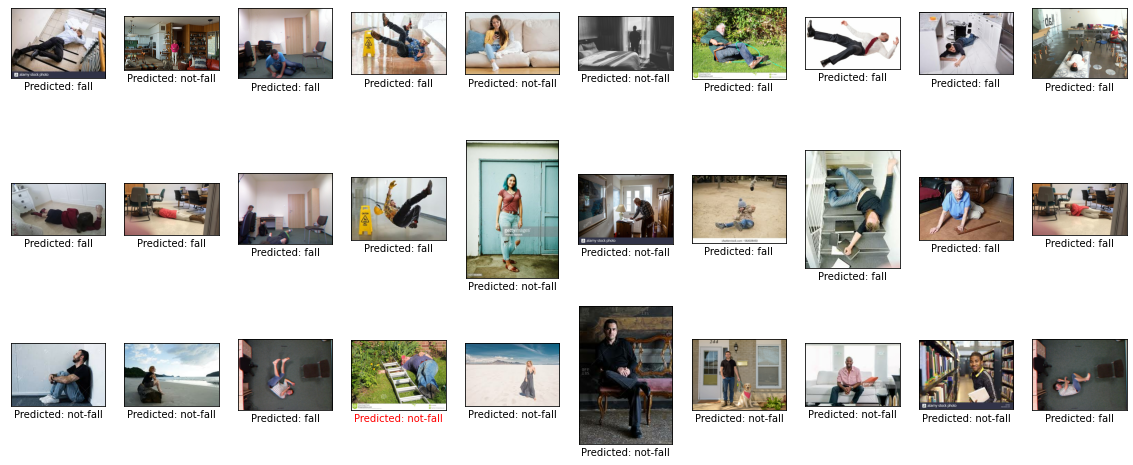

Accuracy-> {'accuracy': 0.9278350515463918}


In [14]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

plt.figure(figsize=(20, 30))
predicts = model.predict_top_k(validation_data)
for i, (image, label) in enumerate(validation_data.gen_dataset().unbatch().take(30)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          validation_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()
print('Accuracy->', accuracy)